In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import hashlib
import numpy as np
#import mplcursors
import mpldatacursor
import plotly.express as px

In [33]:
df  = pd.read_csv("../spritpreise.csv")
df.head()

,Uhrzeit,Datum,Region,Strasse,Ort_PLZ,Tankstelle,Preis
0,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Eichelbergstr. 34,76189 Karlsruhe,Supermarkt Tankstelle,1.699
1,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Hardeckstr. 16,76185 Karlsruhe,"Eberhardt, Hardeckstraße, Karlsruhe",1.709
2,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Lameystr. 7,76185 Karlsruhe,bft,1.719
3,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Fettweisstr. 8,76189 Karlsruhe,bft,1.719
4,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Waldhorn Str. 14-16,76137 Karlsruhe,ZG Raiffeisen Energie,1.719


In [34]:
df[["PLZ","Ort"]] = df["Ort_PLZ"].str.split(' ',1, expand =True)
df['Zeit'] = df['Uhrzeit'].str.split(' ').str[1]
df[["Stunde","Minute","Sekunde"]] = df["Zeit"].str.split(':',2, expand =True)
df['Uhrzeit'] = pd.to_datetime(df['Uhrzeit'])
df['Wochentag'] = df['Uhrzeit'].dt.isocalendar().day
df.head()

,Uhrzeit,Datum,Region,Strasse,Ort_PLZ,Tankstelle,Preis,PLZ,Ort,Zeit,Stunde,Minute,Sekunde,Wochentag
0,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Eichelbergstr. 34,76189 Karlsruhe,Supermarkt Tankstelle,1.699,76189,Karlsruhe,19:25:32,19,25,32,7
1,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Hardeckstr. 16,76185 Karlsruhe,"Eberhardt, Hardeckstraße, Karlsruhe",1.709,76185,Karlsruhe,19:25:32,19,25,32,7
2,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Lameystr. 7,76185 Karlsruhe,bft,1.719,76185,Karlsruhe,19:25:32,19,25,32,7
3,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Fettweisstr. 8,76189 Karlsruhe,bft,1.719,76189,Karlsruhe,19:25:32,19,25,32,7
4,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Waldhorn Str. 14-16,76137 Karlsruhe,ZG Raiffeisen Energie,1.719,76137,Karlsruhe,19:25:32,19,25,32,7


In [35]:
df.groupby(by=["Ort","Wochentag"]).mean().sort_values(by = 'Preis', ascending= False)

Preis
Ort                        Wochentag          
Ettlingen                  2          1.837000
                           7          1.819000
                           1          1.816500
Karlsruhe                  2          1.797859
Rheinstetten               2          1.795250
Knielingen                 2          1.790250
Karlsruhe                  1          1.790111
Rheinstetten               1          1.786500
Knielingen                 1          1.776500
Rheinstetten               7          1.759000
Karlsruhe                  7          1.750942
Landau in der Pfalz        1          1.747491
                           2          1.746033
                           7          1.743286
Neustadt an der Weinstraße 2          1.736308
Knielingen                 7          1.729000
Neustadt an der Weinstraße 1          1.726544
                           7          1.711941
Bornheim                   2          1.699000
                           1          1.695667

In [36]:
df.groupby(by=["Ort"]).mean().sort_values(by = 'Ort', ascending= False)

,Preis,Wochentag
Ort,,
Rheinstetten,1.787333,2.111111
Neustadt an der Weinstraße,1.728603,2.222222
Landau in der Pfalz,1.746284,2.297414
Knielingen,1.780176,1.823529
Karlsruhe,1.787789,2.23284
Ettlingen,1.824769,2.307692
Bornheim,1.697333,1.5


In [37]:
#Need Strasse as identifier, as mutliple Tankstellen with the same name have the same PLZ -
# def generate_id(row):
#     values = row[['Strasse','PLZ','Tankstelle']].values
#     value_str = ''.join(map(str, values))
#     return value_str #hashlib.sha1(value_str.encode()).hexdigest()
# df['ID'] = df.apply(generate_id, axis=1)
# df.head()

In [38]:
#Zweite möglichkeit um die IDs mit Zahlen zu erstellen
df['ID'] = df.groupby(['Strasse','PLZ','Tankstelle']).ngroup()+1
df.head()

,Uhrzeit,Datum,Region,Strasse,Ort_PLZ,Tankstelle,Preis,PLZ,Ort,Zeit,Stunde,Minute,Sekunde,Wochentag,ID
0,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Eichelbergstr. 34,76189 Karlsruhe,Supermarkt Tankstelle,1.699,76189,Karlsruhe,19:25:32,19,25,32,7,15
1,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Hardeckstr. 16,76185 Karlsruhe,"Eberhardt, Hardeckstraße, Karlsruhe",1.709,76185,Karlsruhe,19:25:32,19,25,32,7,22
2,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Lameystr. 7,76185 Karlsruhe,bft,1.719,76185,Karlsruhe,19:25:32,19,25,32,7,31
3,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Fettweisstr. 8,76189 Karlsruhe,bft,1.719,76189,Karlsruhe,19:25:32,19,25,32,7,18
4,2023-07-02 19:25:32,2023-07-02,76135+Karlsruhe%2FBeiertheim,Waldhorn Str. 14-16,76137 Karlsruhe,ZG Raiffeisen Energie,1.719,76137,Karlsruhe,19:25:32,19,25,32,7,48


In [39]:
df_1 = df.loc[df['ID']== 1]
df_1

,Uhrzeit,Datum,Region,Strasse,Ort_PLZ,Tankstelle,Preis,PLZ,Ort,Zeit,Stunde,Minute,Sekunde,Wochentag,ID
44,2023-07-02 19:25:32,2023-07-02,67433+Neustadt+an+der+Weinstraße&spritsorte,Adolf-Kolping-Str. 173,67433 Neustadt an der Weinstraße,GLOBUS Markthalle,1.679,67433,Neustadt an der Weinstraße,19:25:32,19,25,32,7,1
92,2023-07-02 18:18:23,2023-07-02,67433+Neustadt+an+der+Weinstraße&spritsorte,Adolf-Kolping-Str. 173,67433 Neustadt an der Weinstraße,GLOBUS Markthalle,1.679,67433,Neustadt an der Weinstraße,18:18:23,18,18,23,7,1
134,2023-07-02 20:15:30,2023-07-02,67433+Neustadt+an+der+Weinstraße&spritsorte,Adolf-Kolping-Str. 173,67433 Neustadt an der Weinstraße,GLOBUS Markthalle,1.679,67433,Neustadt an der Weinstraße,20:15:30,20,15,30,7,1
160,2023-07-02 22:13:57,2023-07-02,67433+Neustadt+an+der+Weinstraße&spritsorte,Adolf-Kolping-Str. 173,67433 Neustadt an der Weinstraße,GLOBUS Markthalle,1.719,67433,Neustadt an der Weinstraße,22:13:57,22,13,57,7,1
185,2023-07-03 01:40:19,2023-07-03,67433+Neustadt+an+der+Weinstraße&spritsorte,Adolf-Kolping-Str. 173,67433 Neustadt an der Weinstraße,GLOBUS Markthalle,1.719,67433,Neustadt an der Weinstraße,01:40:19,01,40,19,1,1
212,2023-07-03 02:56:56,2023-07-03,67433+Neustadt+an+der+Weinstraße&spritsorte,Adolf-Kolping-Str. 173,67433 Neustadt an der Weinstraße,GLOBUS Markthalle,1.719,67433,Neustadt an der Weinstraße,02:56:56,02,56,56,1,1
257,2023-07-03 04:19:31,2023-07-03,67433+Neustadt+an+der+Weinstraße&spritsorte,Adolf-Kolping-Str. 173,67433 Neustadt an der Weinstraße,GLOBUS Markthalle,1.709,67433,Neustadt an der Weinstraße,04:19:31,04,19,31,1,1
311,2023-07-03 06:21:10,2023-07-03,67433+Neustadt+an+der+Weinstraße&spritsorte,Adolf-Kolping-Str. 173,67433 Neustadt an der Weinstraße,GLOBUS Markthalle,1.679,67433,Neustadt an der Weinstraße,06:21:10,06,21,10,1,1
366,2023-07-03 08:20:19,2023-07-03,67433+Neustadt+an+der+Weinstraße&spritsorte,Adolf-Kolping-Str. 173,67433 Neustadt an der Weinstraße,GLOBUS Markthalle,1.729,67433,Neustadt an der Weinstraße,08:20:19,08,20,19,1,1
420,2023-07-03 10:17:22,2023-07-03,67433+Neustadt+an+der+Weinstraße&spritsorte,Adolf-Kolping-Str. 173,67433 Neustadt an der Weinstraße,GLOBUS Markthalle,1.689,67433,Neustadt an der Weinstraße,10:17:22,10,17,22,1,1


In [45]:
#Trendlinie berechen
x = np.arange(len(df_1))
y = df_1['Preis'].values
trend = np.polyfit(x, y, deg=1)  # Grad 1 für lineare Trendlinie

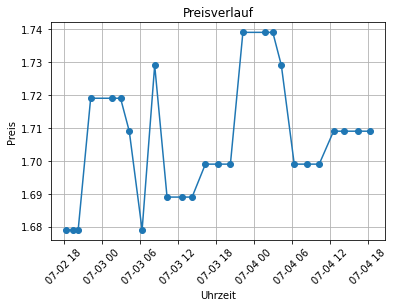

In [54]:
df_1 = df_1.sort_values('Uhrzeit')

# Plot
fig, ax = plt.subplots()
line, = ax.plot(df_1['Uhrzeit'], df_1['Preis'], marker='o', linestyle='-')
ax.set_xlabel('Uhrzeit')
ax.set_ylabel('Preis')
ax.set_title('Preisverlauf')
ax.grid(True)  # Gitterlinien hinzufügen

plt.xticks(rotation=45)
plt.show()


In [59]:
# Mit hoverover funktion
fig = px.line(df_1, x='Uhrzeit', y='Preis', hover_data=['Preis'], markers=True)

fig.update_layout(
    title='Preisverlauf',
    xaxis_title='Datum',
    yaxis_title='Preis'
)

fig.show()